In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
df = pd.read_csv(r'C:\Users\user\Desktop\data-science-journey\jupyter notebooks files\titanic dataset\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
df.shape

(891, 12)

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

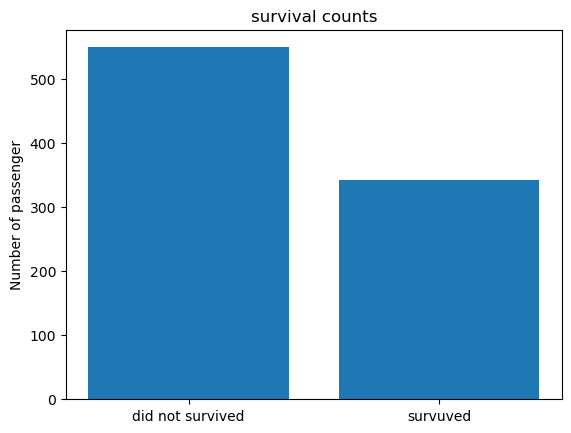

In [54]:
# visualize the raw survival data

plt.bar(df['Survived'].value_counts().index, df['Survived'].value_counts().values)
plt.xticks([0, 1], ['did not survived', 'survuved'])
plt.ylabel('Number of passenger')
plt.title('survival counts')
plt.show()

In [55]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [60]:
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [57]:
# handling missing values

df['Age'].isnull().sum()

np.int64(177)

In [59]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'].isnull().sum()

np.int64(0)

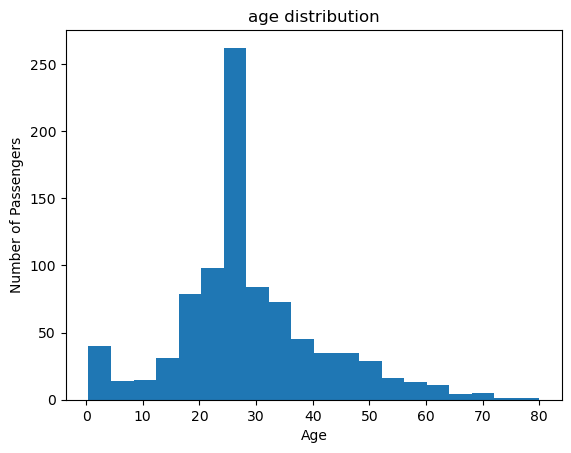

In [61]:
# age distribution

plt.hist(df['Age'], bins = 20)
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('age distribution')
plt.show()

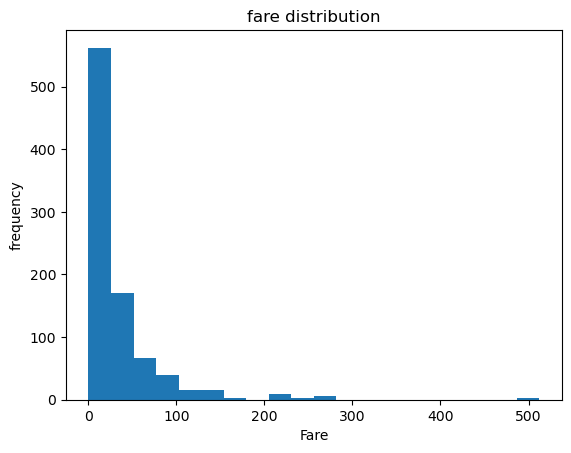

In [64]:
# fare distribution

plt.hist(df['Fare'], bins = 20)
plt.xlabel('Fare')
plt.ylabel('frequency')
plt.title('fare distribution')
plt.show()

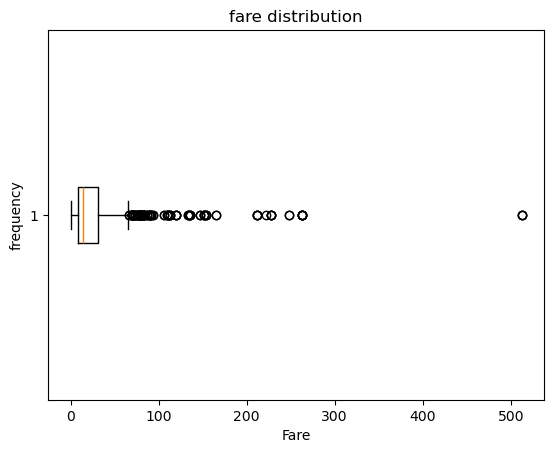

In [66]:
# boxplot to get more context

plt.boxplot(df['Fare'], vert = False)
plt.xlabel('Fare')
plt.ylabel('frequency')
plt.title('fare distribution')
plt.show()

In [73]:
# survival by gender
# this give the survival rate not count

gender_survived = df.groupby('Sex')['Survived'].mean()
gender_survived

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

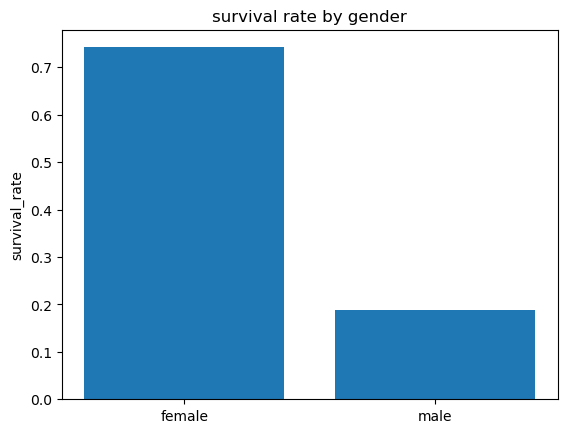

In [76]:
# visualise gender_survived

plt.bar(gender_survived.index, gender_survived.values)
plt.ylabel('survival_rate')
plt.title('survival rate by gender')
plt.show()

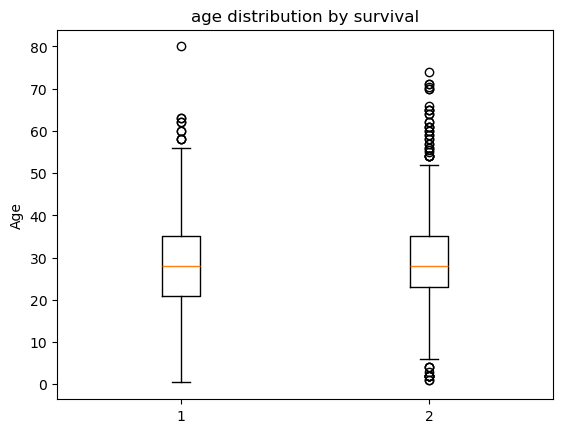

In [77]:
# age survival 

survived = df[df['Survived'] == 1]['Age']
not_survived = df[df['Survived'] == 0]['Age']

plt.boxplot([survived, not_survived], label = ['survived', 'do not survived'])
plt.ylabel('Age')
plt.title('age distribution by survival')
plt.show()